In [96]:
import os
import sys
import logging
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("pylib"))

from handle_sqlite import save_dataframe_to_db, read_table_as_dataframe

In [24]:
# load from dwh
metadata = read_table_as_dataframe("newspapers", "data_output/dwh_data.db")
metadata.head(2)

2025-02-24 10:00:37,067 - INFO - Data read from table 'newspapers' in 'data_output/dwh_data.db' successfully.


,newspaper_name,data_published,klima_mentions_count,newspaper_id
0,zeit,2025-01-14,8,1
1,heise,2025-01-14,0,2


In [25]:
context = read_table_as_dataframe("context", "data_output/dwh_data.db")
context.head(2)

2025-02-24 10:00:44,856 - INFO - Data read from table 'context' in 'data_output/dwh_data.db' successfully.


,pre_context,post_context,prefix,suffix,newspaper_id
0,Wünsche für mehr,Folge 18 :,,schutz,1
1,Wünsche für mehr,Endlich wirksame Maßnahmen,,schutz,1


In [26]:
context = context.astype({'pre_context': 'string',
                         'post_context': 'string',
                         'prefix': 'string',
                         'suffix': 'string',})
context.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pre_context   890 non-null    object
 1   post_context  890 non-null    object
 2   prefix        890 non-null    object
 3   suffix        890 non-null    object
 4   newspaper_id  890 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [29]:
context = context.astype({'pre_context': 'string',
                         'post_context': 'string',
                         'prefix': 'string',
                         'suffix': 'string',})
context.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pre_context   890 non-null    string
 1   post_context  890 non-null    string
 2   prefix        890 non-null    string
 3   suffix        890 non-null    string
 4   newspaper_id  890 non-null    int64 
dtypes: int64(1), string(4)
memory usage: 34.9 KB


In [27]:
metadata = metadata.astype({'newspaper_name': 'string',
                'klima_mentions_count': 'int'})
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   newspaper_name        409 non-null    string
 1   data_published        409 non-null    object
 2   klima_mentions_count  409 non-null    int64 
 3   newspaper_id          409 non-null    int64 
dtypes: int64(2), object(1), string(1)
memory usage: 12.9+ KB


In [33]:
# dublicated newspapers published
metadata.duplicated().sum()

0

In [31]:
# dublicates of context, including newspaper id. indicates static use
# of klima, like navigation term of a paper.
context.duplicated().sum()

49

In [84]:
# Number of Papers with at least once klima
context.newspaper_id.nunique() / len(context) * 100

22.02247191011236

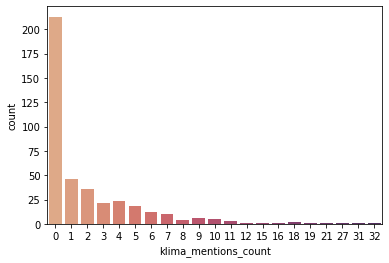

In [137]:
# histogram of the times, klima is used in one single paper publish
ax = sns.countplot(data=metadata, x="klima_mentions_count", palette="flare")
#ax.bar_label(ax.containers[0])
plt.show()

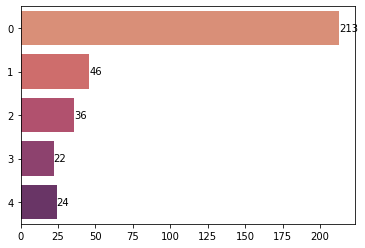

In [136]:
# look at the lower freq edges

top_three = sorted(metadata['klima_mentions_count'].unique())[:5]
counts = metadata['klima_mentions_count'].value_counts().loc[top_three]

ax = sns.barplot(y=counts.index, x=counts.values, orient='h', palette="flare")
ax.bar_label(ax.containers[0])
plt.show()

In [122]:
# look at the higher freq edges and its newspapers

top_three = sorted(metadata['klima_mentions_count'].unique())[-5:]
counts = metadata['klima_mentions_count'].value_counts().loc[top_three]
counts

19    1
21    1
27    1
31    1
32    1
Name: klima_mentions_count, dtype: int64

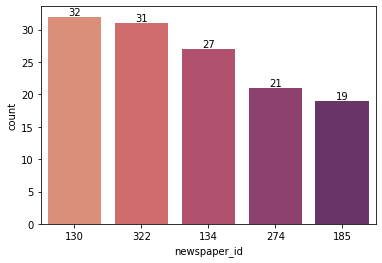

In [138]:
ax=sns.countplot(data=context, x="newspaper_id", order=context.newspaper_id.value_counts().iloc[:5].index, palette="flare")
ax.bar_label(ax.containers[0])
plt.show()

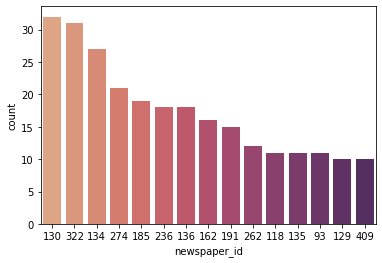

In [139]:
ax=sns.countplot(data=context, x="newspaper_id", order=context.newspaper_id.value_counts().iloc[:15].index, palette="flare")
#ax.bar_label(ax.containers[0])
plt.show()